In [39]:
!nvidia-smi

Sun Dec  8 00:47:46 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [40]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [48]:
#RUN THIS ONLY AFTER SAVING PREDS TO TRAIN
import shutil
shutil.rmtree('/kaggle/working/Underwater-Trash-Detection-2/train/predict')

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6013.4/8062.4 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HhNnM9lzMEeBCZh4mD5x")
project = rf.workspace("plastic-detection-r16is").project("underwater-trash-detection-ftwke")
version = project.version(2)
dataset = version.download("yolov8")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


In [49]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/kaggle/working
New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Underwater-Trash-Detection-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

/kaggle/working


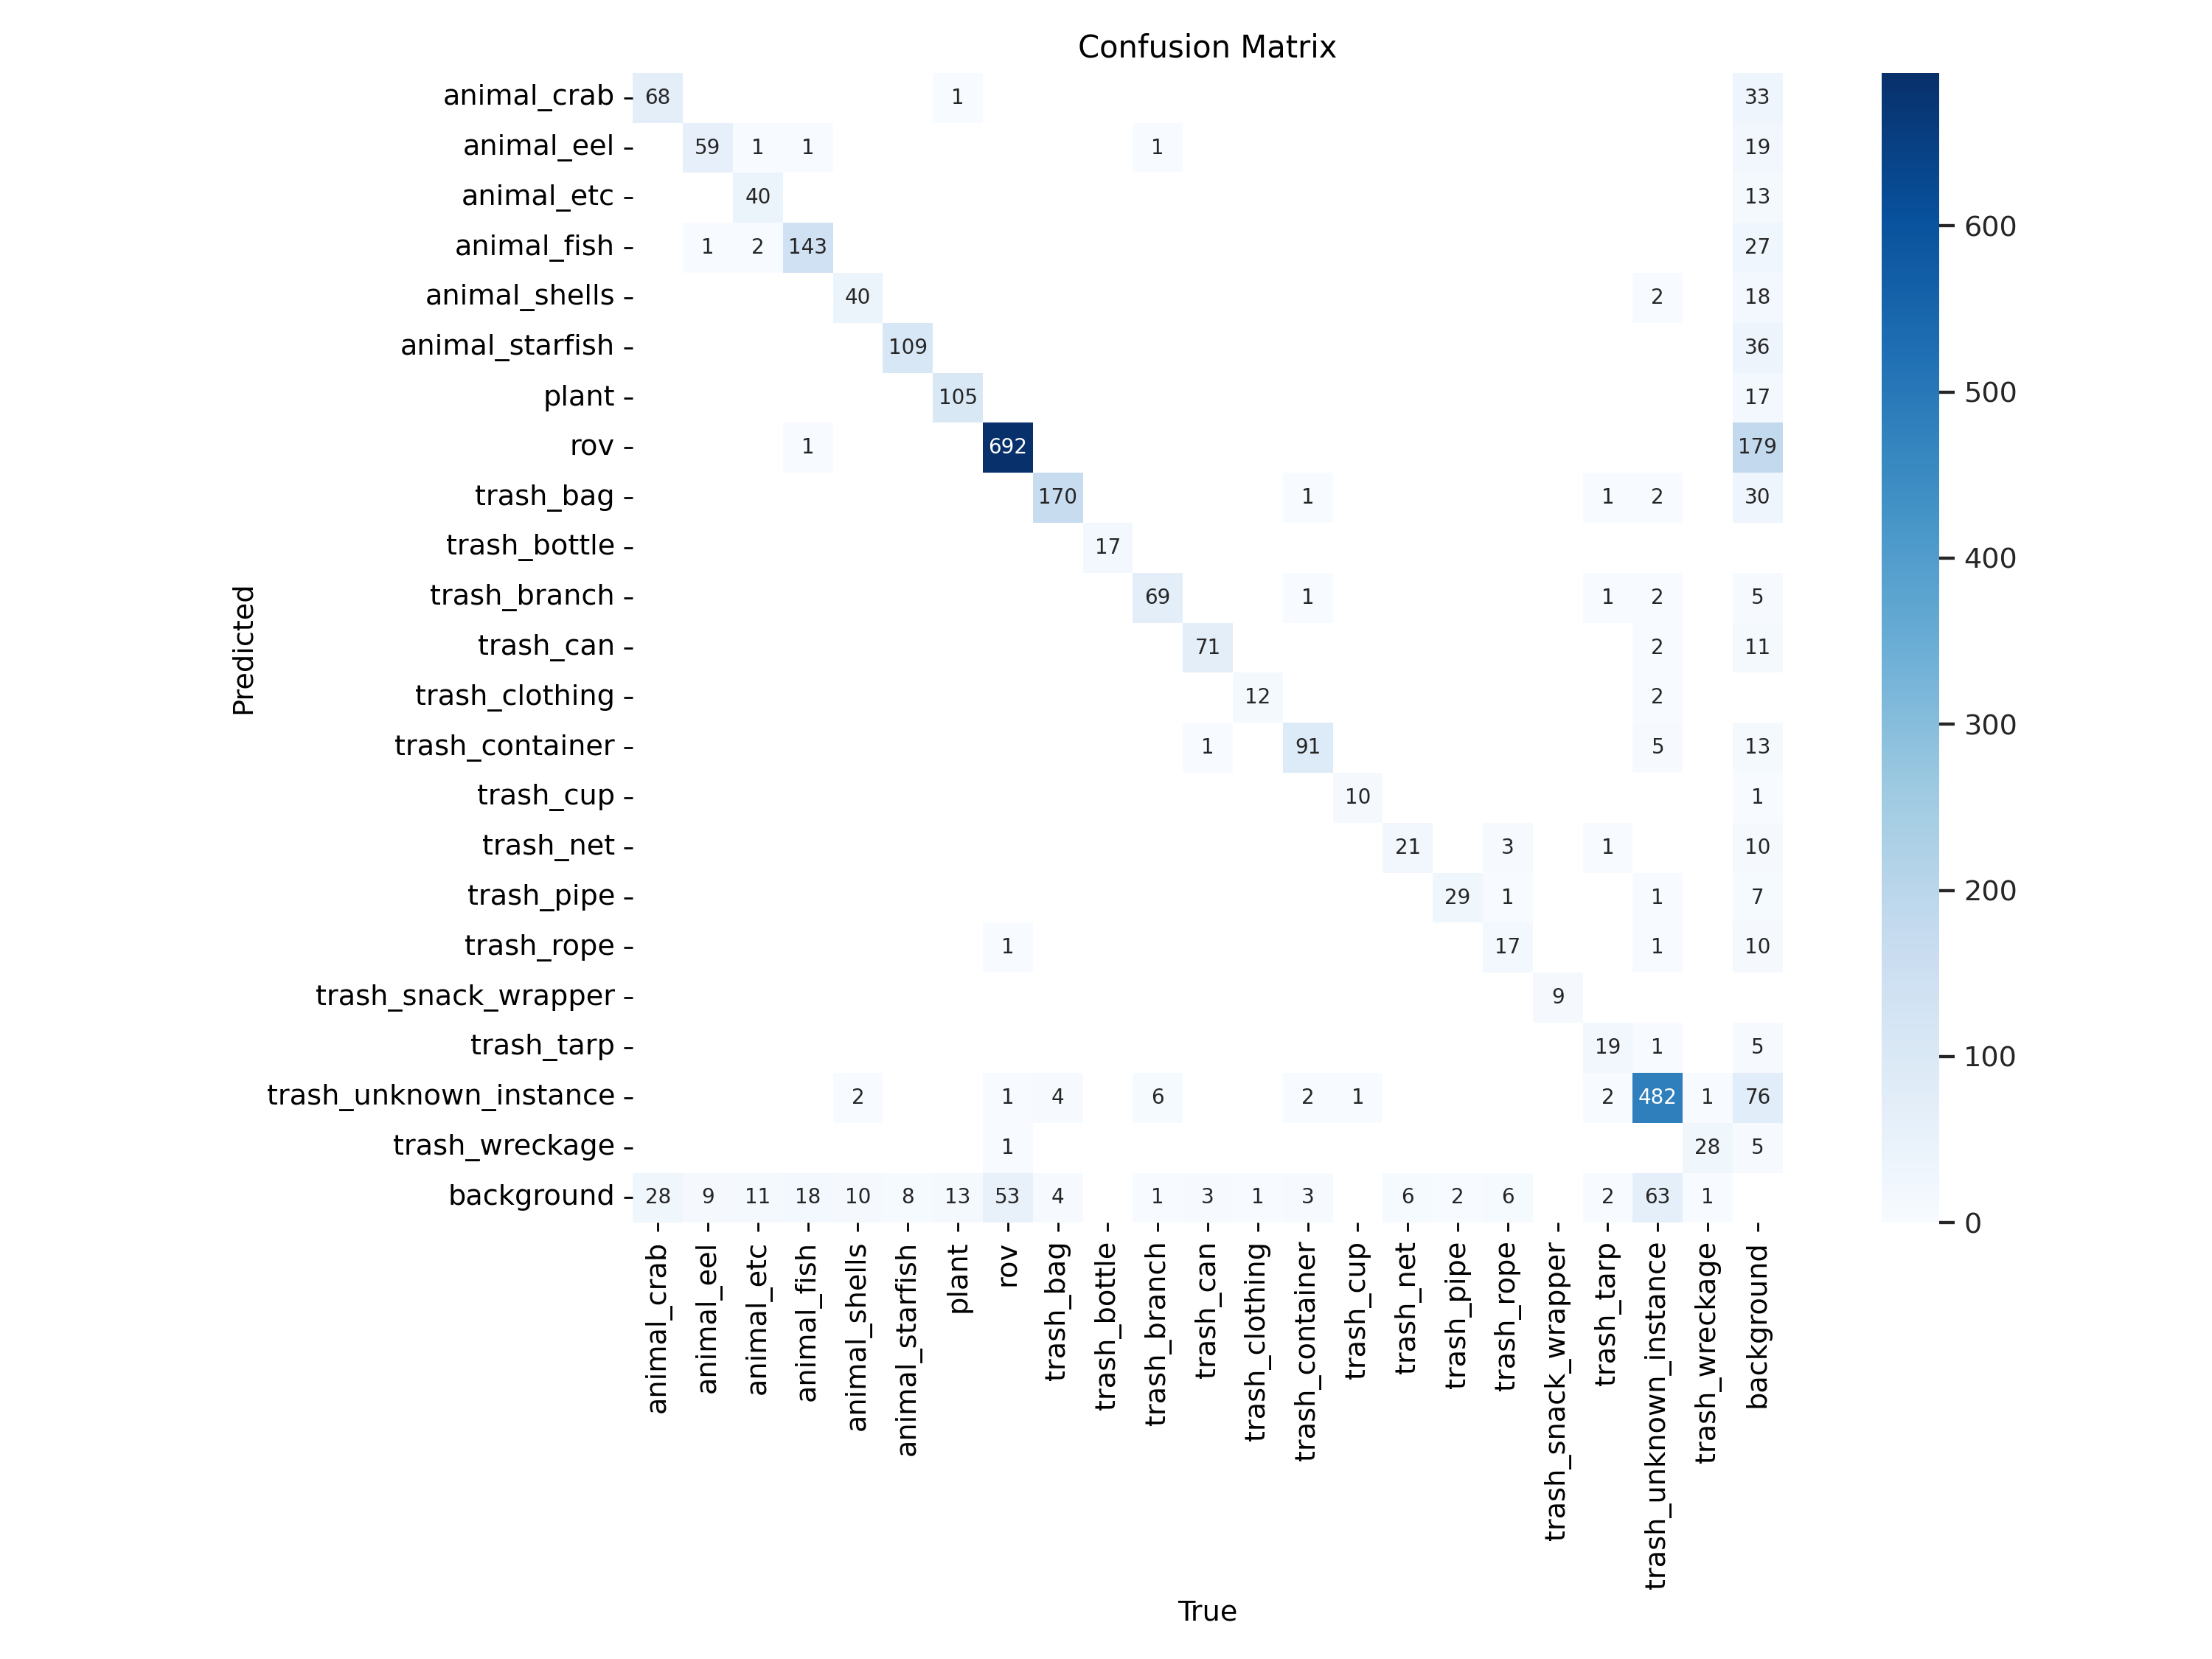

In [50]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/kaggle/working


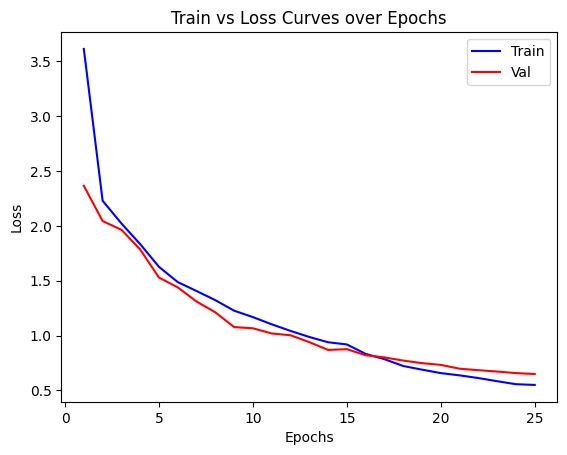

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%cd {HOME}

df = pd.read_csv(f'{HOME}/runs/detect/train3/results.csv')
plt.plot(df.iloc[:,0], df.iloc[:,2], label='Train', color='blue')

# Plot the second curve
plt.plot(df.iloc[:,0], df.iloc[:,9], label='Val', color='red')

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Loss Curves over Epochs')
plt.legend()

# Show the graph
plt.show()

/kaggle/working


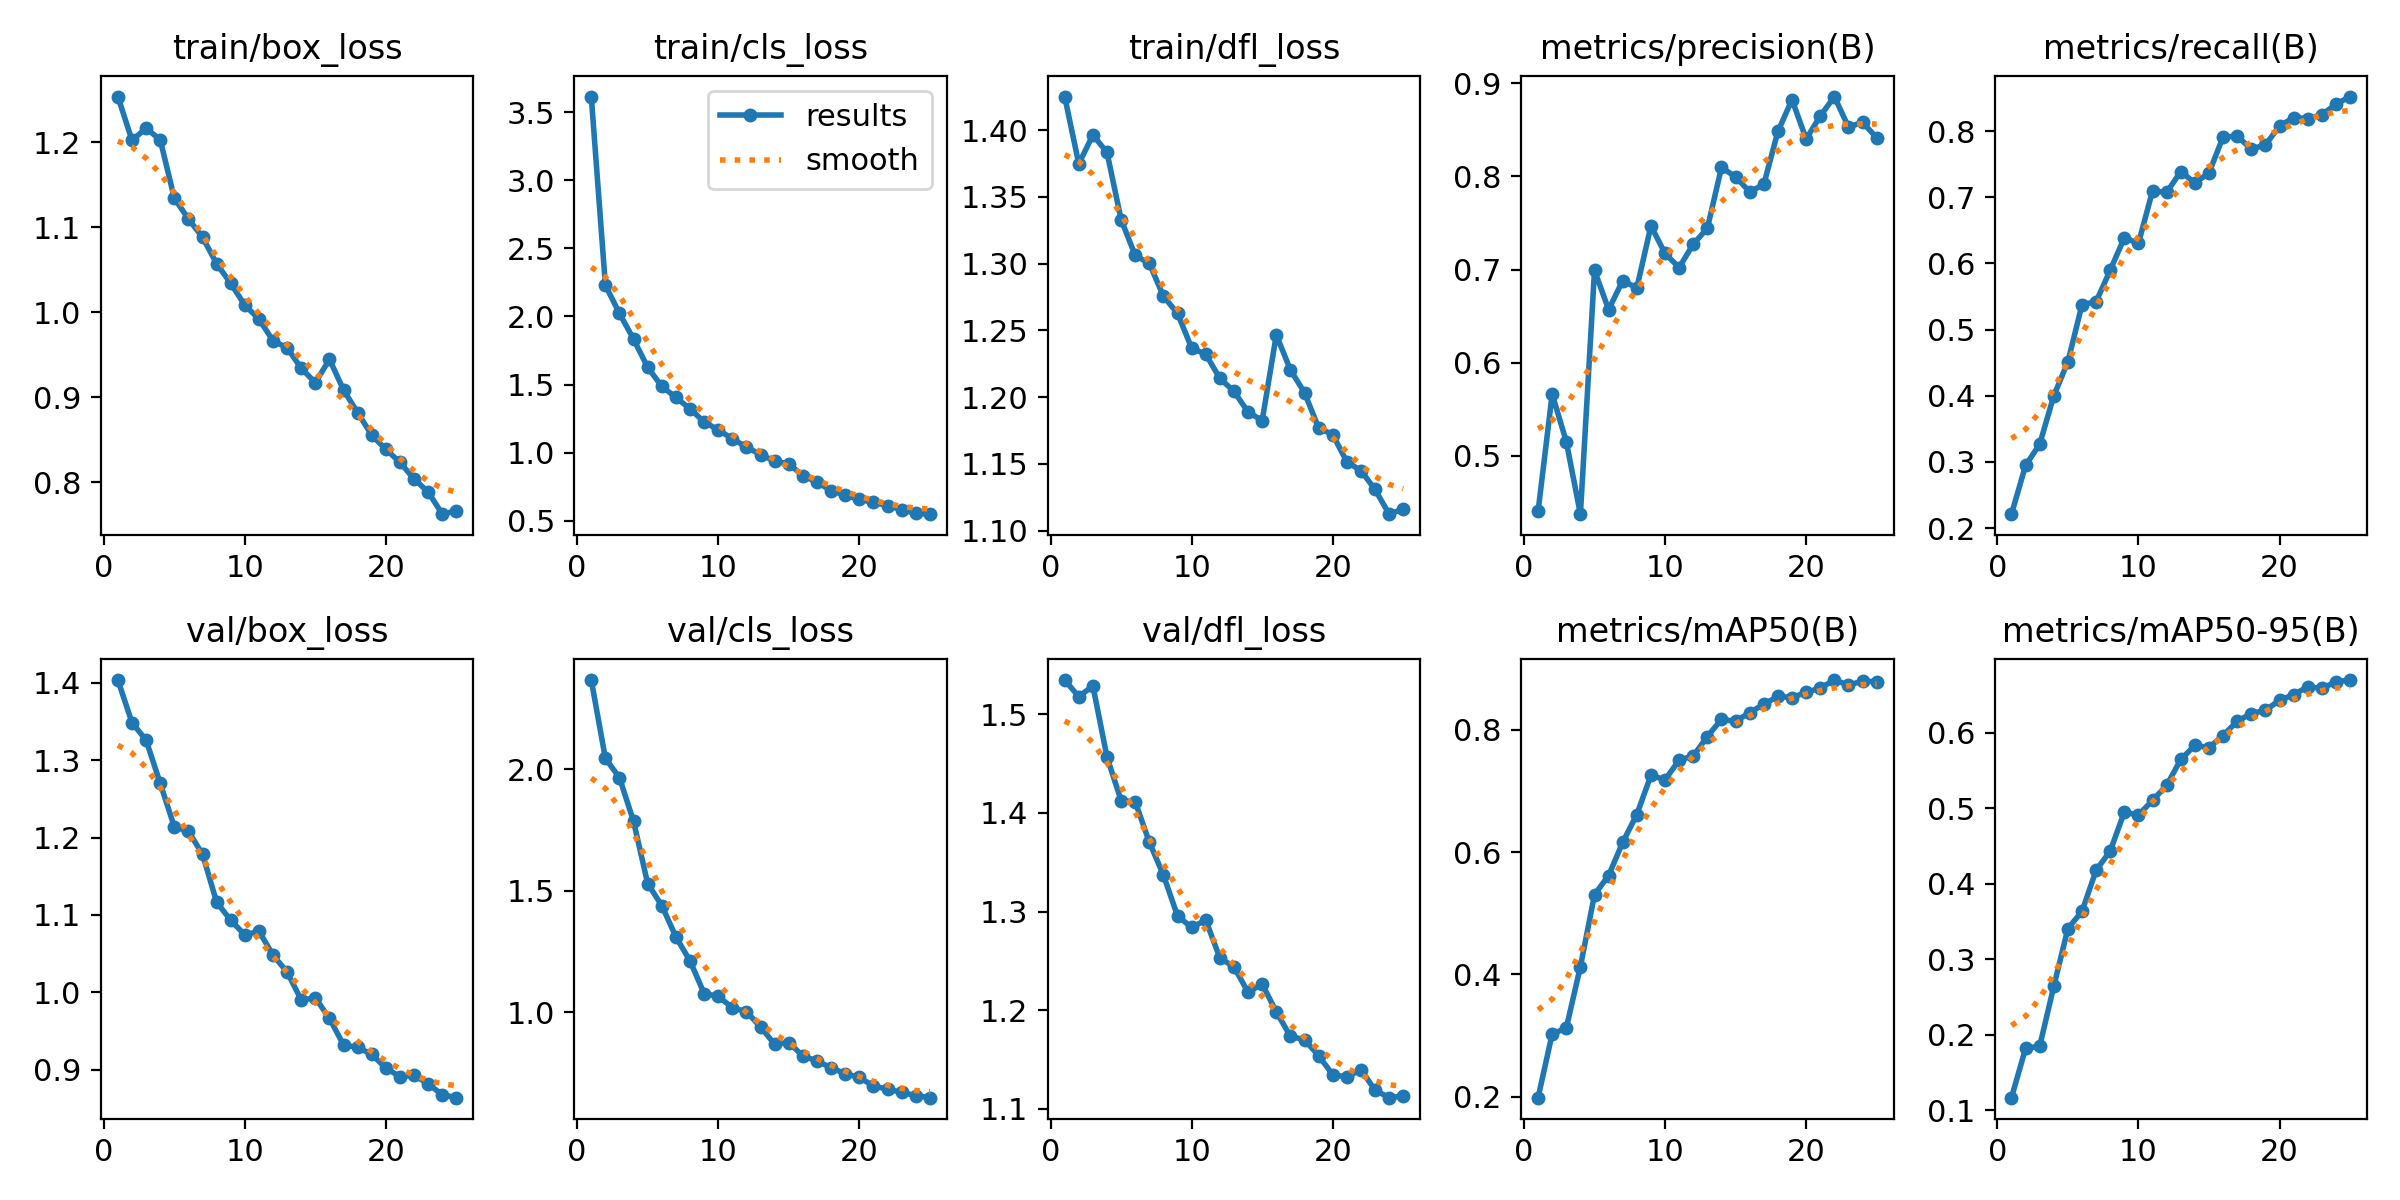

In [52]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/kaggle/working


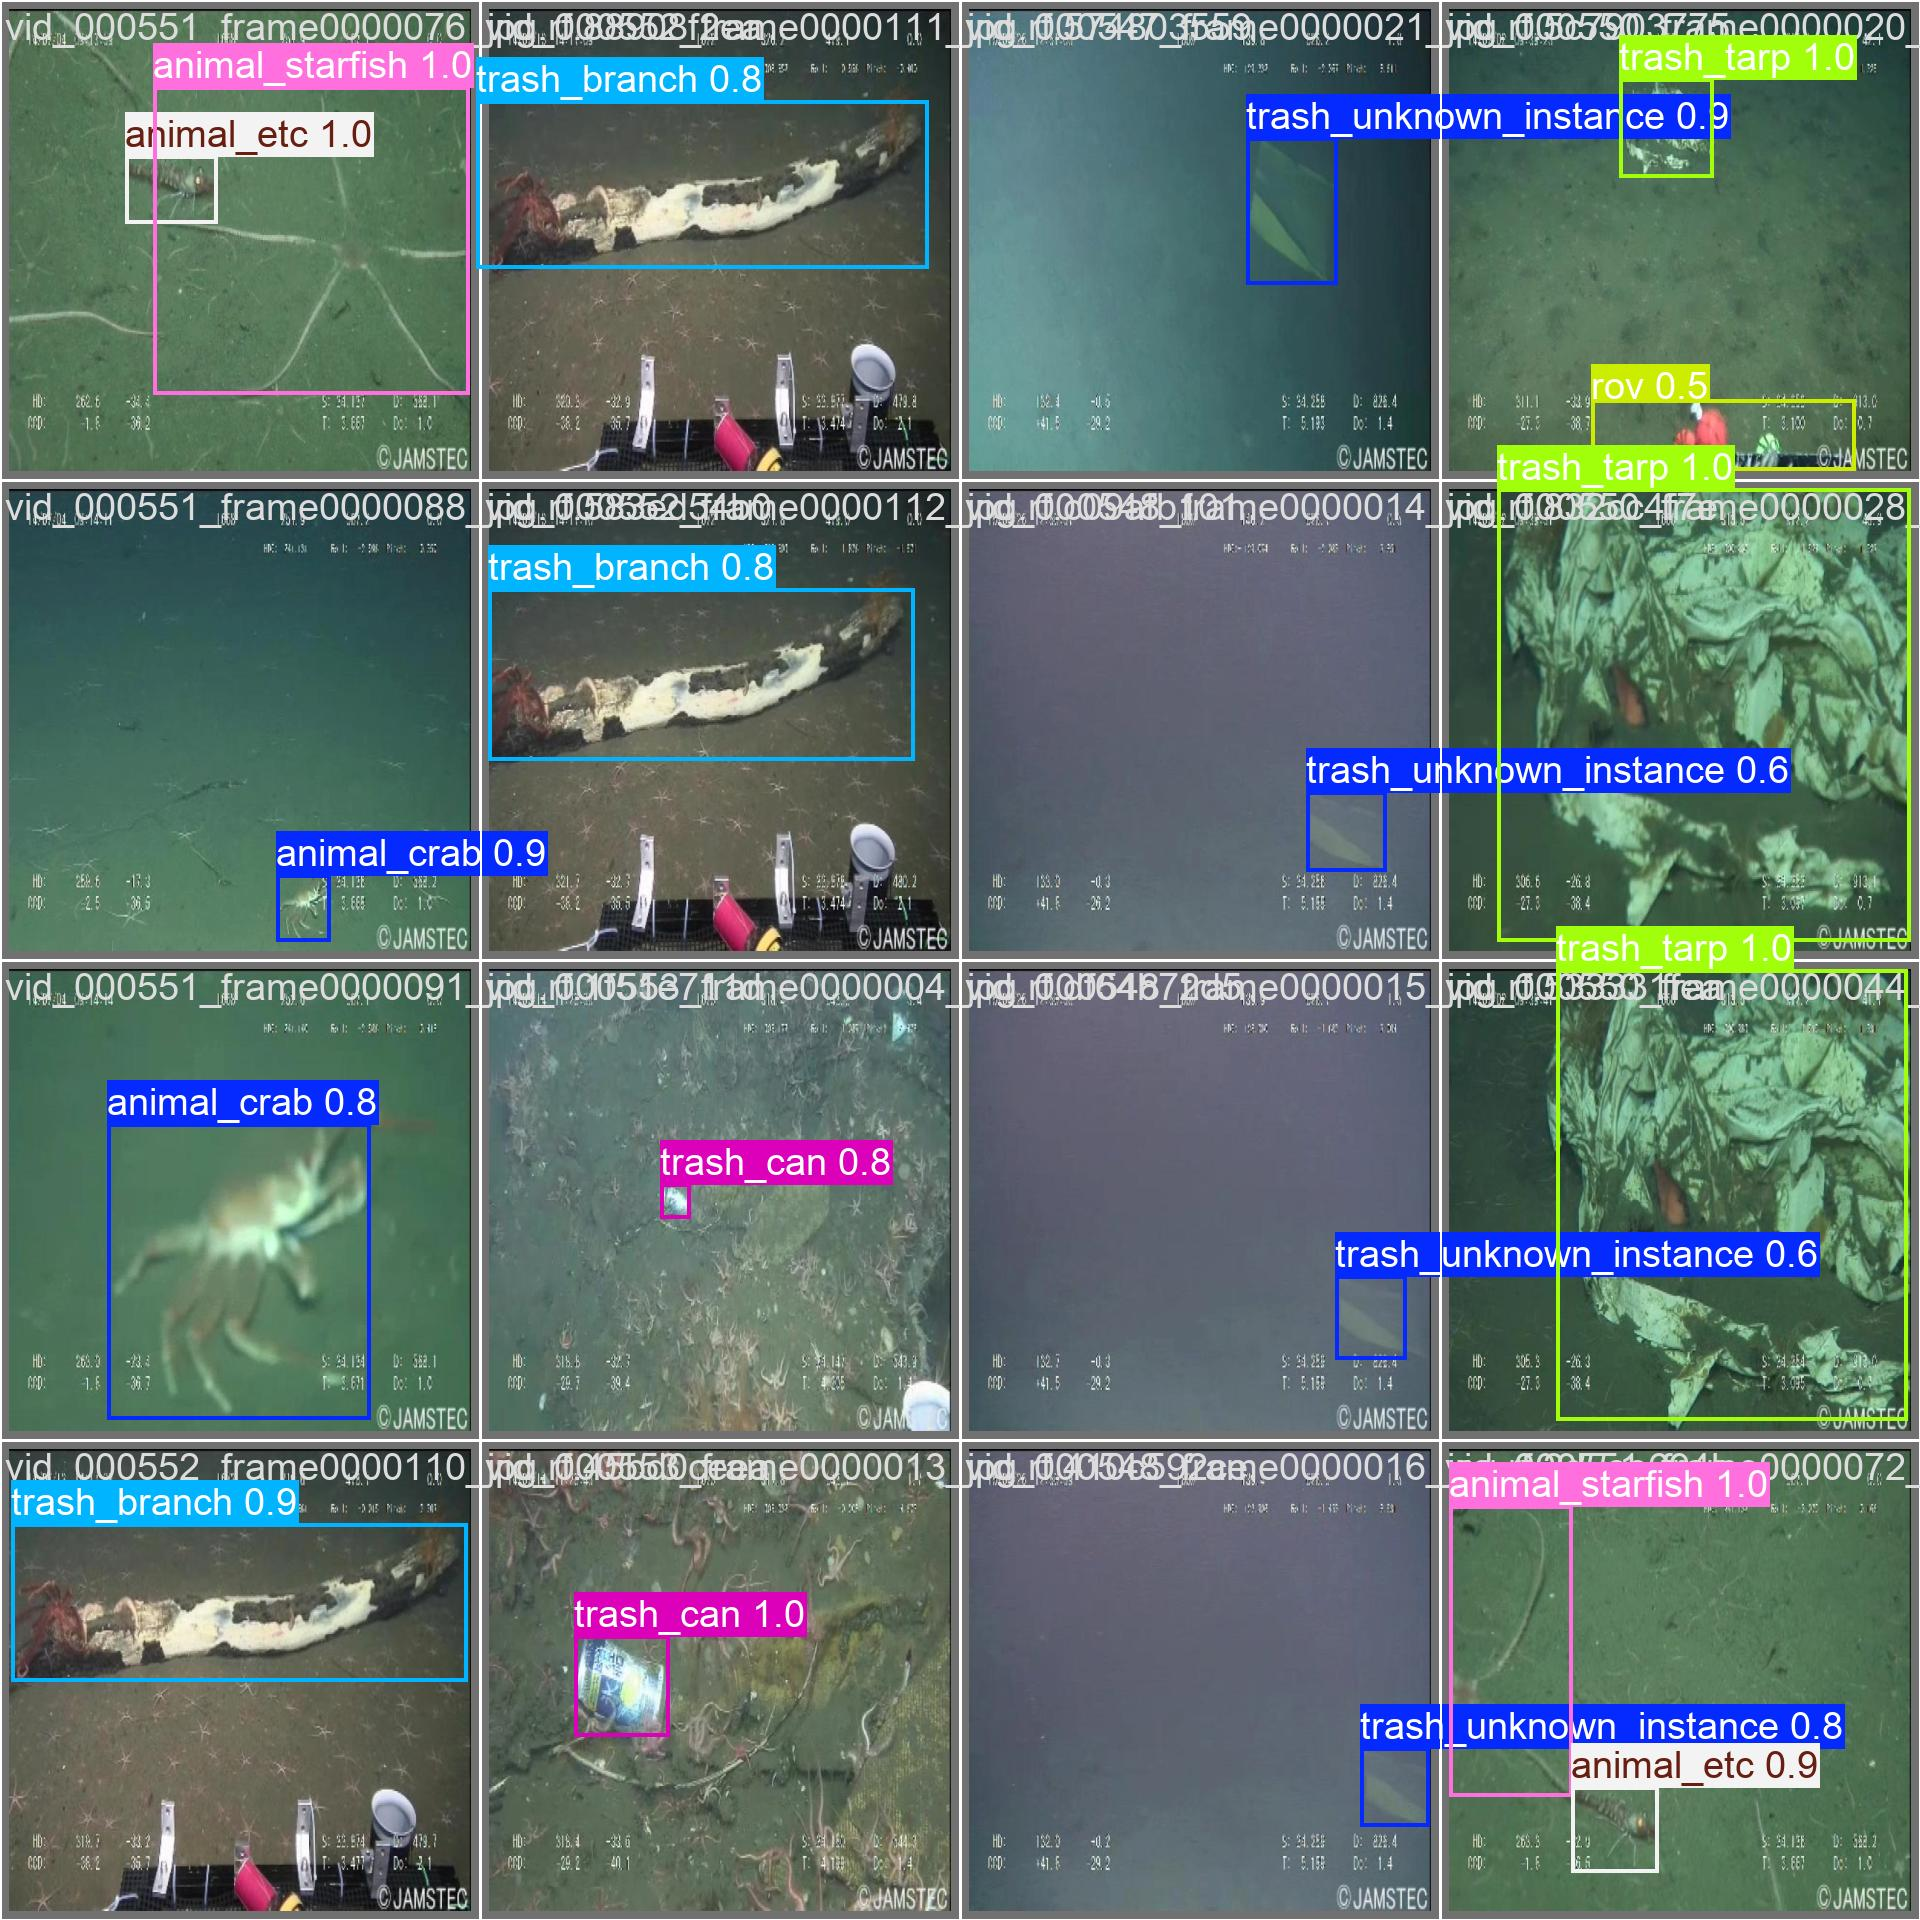

In [53]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [54]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.2.103 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,134,098 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/Underwater-Trash-Detection-2/valid/labels.cache...
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1442       2600      0.842      0.852      0.878      0.671
           animal_crab         36         96      0.719      0.646      0.693      0.414
            animal_eel         57         69      0.795      0.841      0.847      0.593
            animal_etc         50         54      0.911      0.759      0.807       0.57
           animal_fish        144        163      0.907      0.853      0.905      0.702
         animal_shells         28         52      0.689      0.639      0.683      0.442
       animal_starfish         28        117      0.792      0.838      0.825      0.446
                 plant        115 

In [55]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.7 source={dataset.location}/test/images project={dataset.location}/train save=True save_txt=True half=True batch=16

/kaggle/working
Ultralytics YOLOv8.2.103 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,134,098 parameters, 0 gradients, 28.5 GFLOPs

image 1/623 /kaggle/working/Underwater-Trash-Detection-2/test/images/vid_000003_frame0000018_jpg.rf.8d19a137a267969e58aef05dbe740e30.jpg: 800x800 1 trash_tarp, 8.4ms
image 2/623 /kaggle/working/Underwater-Trash-Detection-2/test/images/vid_000021_frame0000025_jpg.rf.fa7fd35d4d7ba71c56d9588e6536b9b1.jpg: 800x800 2 rovs, 1 trash_unknown_instance, 8.4ms
image 3/623 /kaggle/working/Underwater-Trash-Detection-2/test/images/vid_000021_frame0000035_jpg.rf.028e1e96d45446e2421b0609f5e7d1f6.jpg: 800x800 2 rovs, 8.4ms
image 4/623 /kaggle/working/Underwater-Trash-Detection-2/test/images/vid_000024_frame0000030_jpg.rf.50f36287856f11b0cf1aef057690fc6a.jpg: 800x800 1 trash_unknown_instance, 8.4ms
image 5/623 /kaggle/working/Underwater-Trash-Detection-2/test/images/vid_000025_frame0000012_jpg.rf.064133b4a9cd6c87d38e5cbd18cc

In [56]:
import os
import shutil

# Define paths
predictions_folder = '/kaggle/working/Underwater-Trash-Detection-2/train/predict'
train_images_folder = '/kaggle/working/Underwater-Trash-Detection-2/train/images'
train_labels_folder = '/kaggle/working/Underwater-Trash-Detection-2/train/labels'
count = 0

# List all files in the predictions folder
for file_name in os.listdir(predictions_folder):
    source_path = os.path.join(predictions_folder, file_name)
    count+=1

    if count < 100:
        # Move images to the train images folder
        if file_name.endswith('.jpg'):  # Update the extension if using PNG or other formats
            dest_path = os.path.join(train_images_folder, file_name)
            shutil.move(source_path, dest_path)
            print(f"Moved image: {file_name}")
            os.remove(f'/kaggle/working/Underwater-Trash-Detection-2/test/images/{file_name}')
        
        # Move labels to the train labels folder
        elif file_name.endswith('.txt'):  # Assuming YOLO labels are in text files
            dest_path = os.path.join(train_labels_folder, file_name)
            shutil.move(source_path, dest_path)
            print(f"Moved label: {file_name}")
            os.remove(f'/kaggle/working/Underwater-Trash-Detection-2/test/labels/{file_name}')

Moved image: vid_000080_frame0000077_jpg.rf.f9733b4c9a2c25fb2011ea24fa850471.jpg
Moved image: vid_000213_frame0000016_jpg.rf.90224f47b68371b774e9bb4db4bcbc20.jpg
Moved image: vid_000291_frame0000065_jpg.rf.99c9314dc19d0d7d7703f0723674ce06.jpg
Moved image: vid_000317_frame0000052_jpg.rf.21be5f1b496e57e70f27da19cdf2366b.jpg
Moved image: vid_000255_frame0000072_jpg.rf.6e4f217caabfdaf9fbb86176dbf714d7.jpg
Moved image: vid_000139_frame0000015_jpg.rf.b8955251c344e2afa40a7316b41cfc59.jpg
Moved image: vid_000098_frame0000015_jpg.rf.780f60b13bcd61202d64c6e34b0266db.jpg
Moved image: vid_000106_frame0000036_jpg.rf.e5b12ae4a6db2254085d212c8913d8c8.jpg
Moved image: vid_000339_frame0000013_jpg.rf.606d3c97673a7bf9117d2be98940c633.jpg
Moved image: vid_000151_frame0000012_jpg.rf.26fb821f2c4abda264d5ee04ffb7fc65.jpg
Moved image: vid_000332_frame0000131_jpg.rf.818a68ab31db6d6d0325cc0bad997640.jpg
Moved image: vid_000075_frame0000075_jpg.rf.5bb9f0477532318349eb229d19473ad2.jpg
Moved image: vid_000260_fram

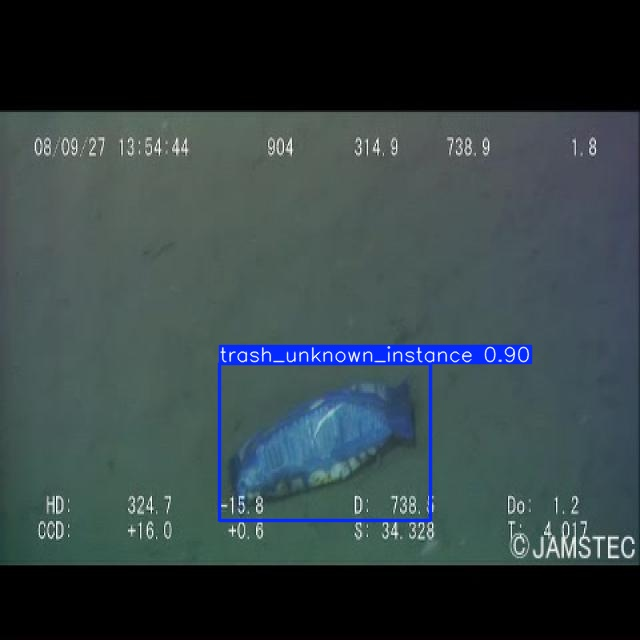

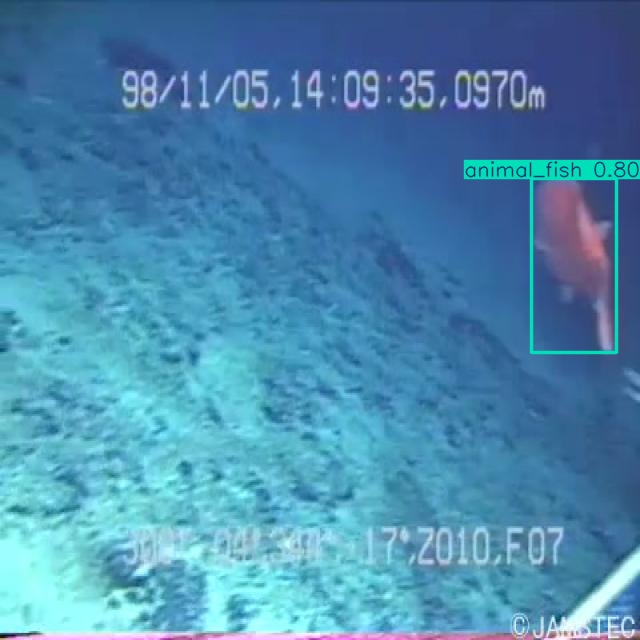

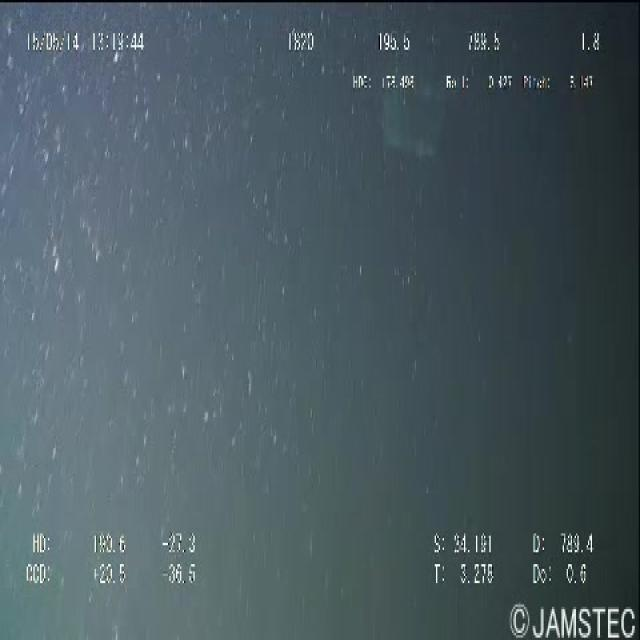

In [57]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/kaggle/working/Underwater-Trash-Detection-2/train/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")